In [4]:
import sys
import os
from pathlib import Path

# ========================================
# CONFIGURACIÓN DE RUTAS DEL PROYECTO
# ========================================
if 'notebooks' in os.getcwd():
    PROJECT_ROOT = Path(os.getcwd()).parent
else:
    PROJECT_ROOT = Path(os.getcwd())

sys.path.append(str(PROJECT_ROOT / 'src'))

OUTPUT_DIR = PROJECT_ROOT / 'output'
DATA_DIR = PROJECT_ROOT / 'data'

# Crear directorios
OUTPUT_DIR.mkdir(exist_ok=True)
DATA_DIR.mkdir(exist_ok=True)

# ========================================
# IMPORTS
# ========================================
from database import PriceDatabase
from analyzer import PriceAnalyzer, plot_price_evolution, compare_products
from utils import (
    format_price, 
    generate_report, 
    save_report,
    export_to_json
)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# ========================================
# CONFIGURACIÓN DE VISUALIZACIÓN
# ========================================
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ========================================
# INICIALIZAR BASE DE DATOS
# ========================================
db = PriceDatabase(str(DATA_DIR / "prices.db"))

print("✓ Módulos cargados")
print(f"📅 {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print(f"📁 Proyecto: {PROJECT_ROOT}")
print(f"📁 Output: {OUTPUT_DIR}")
print(f"📁 Data: {DATA_DIR}")

✓ Base de datos inicializada correctamente
✓ Módulos cargados
📅 11/12/2025 13:01
📁 Proyecto: C:\Users\PC\Desktop\mercadolibre-price-monitor
📁 Output: C:\Users\PC\Desktop\mercadolibre-price-monitor\output
📁 Data: C:\Users\PC\Desktop\mercadolibre-price-monitor\data


# 📊 Notebook 4: Análisis de Datos y Visualizaciones

En este notebook vamos a:
1. Crear gráficos de evolución de precios
2. Comparar múltiples productos
3. Análisis estadístico avanzado
4. Generar reportes
5. Exportar datos

---

## 📚 Setup e Imports

In [5]:
import sys
import os
from pathlib import Path

# ========================================
# CONFIGURACIÓN DE RUTAS DEL PROYECTO
# ========================================
if 'notebooks' in os.getcwd():
    PROJECT_ROOT = Path(os.getcwd()).parent
else:
    PROJECT_ROOT = Path(os.getcwd())

sys.path.append(str(PROJECT_ROOT / 'src'))

OUTPUT_DIR = PROJECT_ROOT / 'output'
DATA_DIR = PROJECT_ROOT / 'data'

# Crear directorios
OUTPUT_DIR.mkdir(exist_ok=True)
DATA_DIR.mkdir(exist_ok=True)

# ========================================
# IMPORTS
# ========================================
from database import PriceDatabase
from analyzer import PriceAnalyzer, plot_price_evolution, compare_products
from utils import (
    format_price, 
    generate_report, 
    save_report,
    export_to_json
)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime

# Configuración de visualización
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Inicializar base de datos
db = PriceDatabase(str(DATA_DIR / "prices.db"))

print("✓ Módulos cargados")
print(f"📅 {datetime.now().strftime('%d/%m/%Y %H:%M')}")
print(f"📁 Output: {OUTPUT_DIR}")

✓ Base de datos inicializada correctamente
✓ Módulos cargados
📅 11/12/2025 13:01
📁 Output: C:\Users\PC\Desktop\mercadolibre-price-monitor\output


## 1️⃣ Vista General de Datos

In [2]:
# Estadísticas generales
stats = db.get_stats()
products = db.get_all_products()

print("📊 ESTADÍSTICAS GENERALES")
print("="*70)
print(f"Total de productos monitoreados: {stats['total_products']}")
print(f"Total de registros de precios: {stats['total_prices']}")
print(f"Primer registro: {stats.get('first_record', 'N/A')}")
print(f"Último registro: {stats.get('last_record', 'N/A')}")
print("="*70)

if products:
    # Calcular algunas métricas interesantes
    total_price_points = sum(p['price_count'] for p in products)
    avg_price_points = total_price_points / len(products)
    
    print(f"\nPromedio de registros por producto: {avg_price_points:.1f}")
    
    # Producto con más registros
    most_tracked = max(products, key=lambda x: x['price_count'])
    print(f"\nProducto más rastreado:")
    print(f"  {most_tracked['title'][:60]}")
    print(f"  Registros: {most_tracked['price_count']}")

📊 ESTADÍSTICAS GENERALES
Total de productos monitoreados: 1
Total de registros de precios: 7
Primer registro: 2025-12-11T12:23:55.649957
Último registro: 2025-12-11T12:32:21.832275

Promedio de registros por producto: 7.0

Producto más rastreado:
  Sin título
  Registros: 7


## 2️⃣ Gráficos de Evolución de Precios

Visualiza cómo han cambiado los precios en el tiempo.

### 2.1 Evolución de un producto específico (Interactivo)

📈 Evolución de precio: Sin título



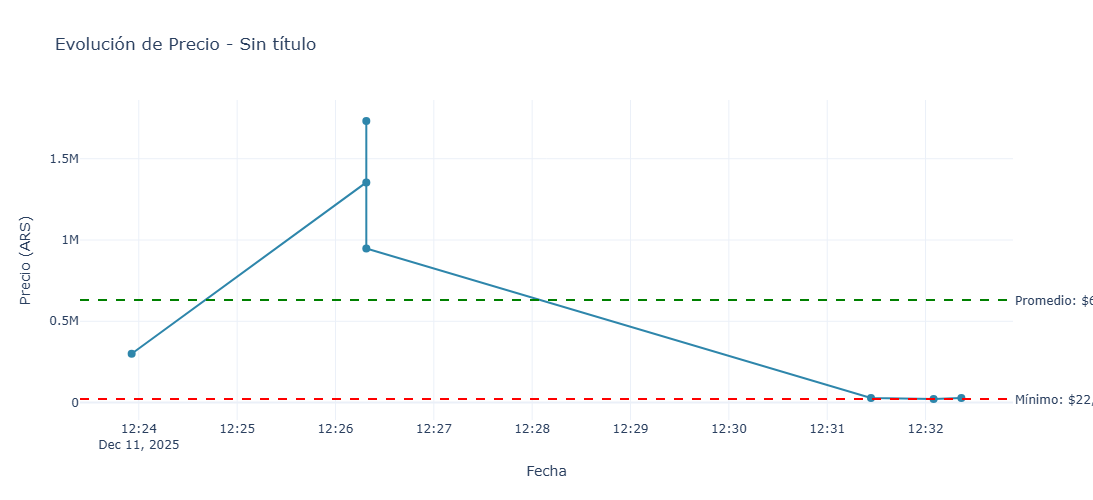


💰 Estadísticas:
  Precio actual: $28.900
  Precio mínimo: $22.000
  Precio máximo: $1.732.099
  Variación total: -90.37%


In [3]:
if products:
    # Seleccionar producto a analizar
    product_index = 0  # 👈 Cambia este índice para ver otros productos
    
    product = products[product_index]
    history = db.get_price_history(product['id'])
    
    if len(history) >= 2:
        print(f"📈 Evolución de precio: {product['title'][:60]}\n")
        
        # Crear analizador
        analyzer = PriceAnalyzer(history)
        
        # Gráfico interactivo con Plotly
        analyzer.plot_price_evolution(interactive=True)
        
        # Mostrar estadísticas
        stats = analyzer.get_statistics()
        print("\n💰 Estadísticas:")
        print(f"  Precio actual: {format_price(stats['precio_actual'])}")
        print(f"  Precio mínimo: {format_price(stats['precio_minimo'])}")
        print(f"  Precio máximo: {format_price(stats['precio_maximo'])}")
        print(f"  Variación total: {stats['variacion_porcentual']:.2f}%")
    else:
        print(f"⚠️ Necesitas al menos 2 registros de precio para este producto")
else:
    print("⚠️ No hay productos en la base de datos")

### 2.2 Guardar gráfico como imagen

✓ Gráfico guardado en: ../output/price_evolution_0.png

✓ Gráfico guardado en: ../output/price_evolution_0.png


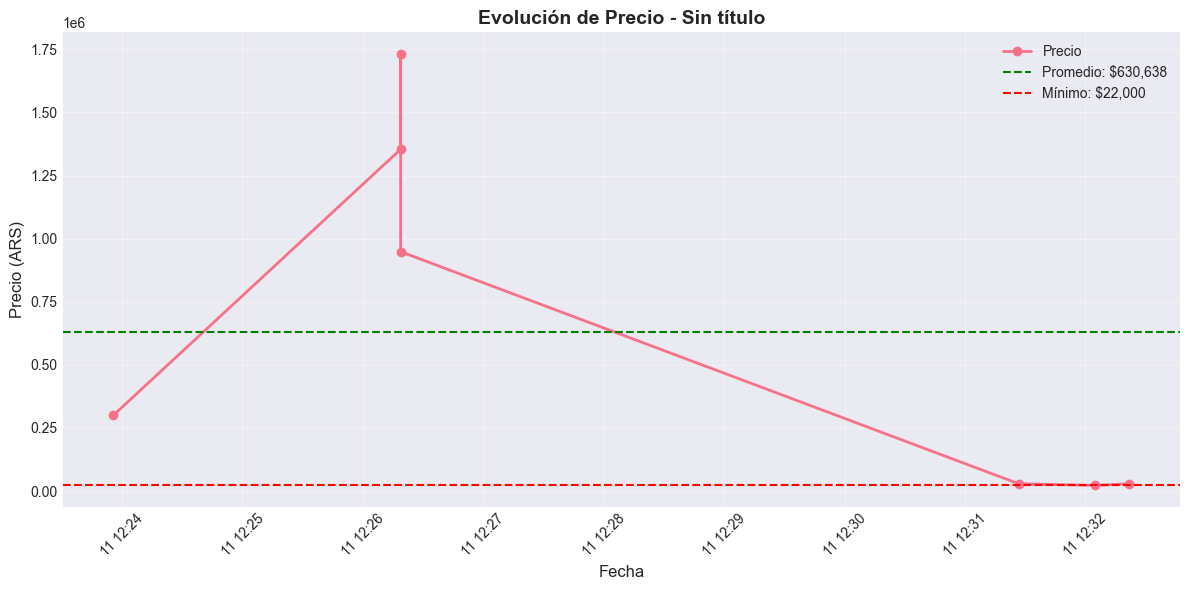

In [4]:
if products and len(history) >= 2:
    # Crear gráfico estático para guardar
    output_path = f"../output/price_evolution_{product['id']}.png"
    
    analyzer.plot_price_evolution(save_path=output_path, interactive=False)
    
    print(f"\n✓ Gráfico guardado en: {output_path}")

## 3️⃣ Comparación de Múltiples Productos

Compara la evolución de precios de varios productos al mismo tiempo.

In [5]:
if len(products) >= 2:
    # Seleccionar productos a comparar (primeros 3)
    products_to_compare = products[:3]  # 👈 Ajusta esto según tus necesidades
    
    print(f"📊 Comparando {len(products_to_compare)} productos...\n")
    
    # Preparar datos para comparación
    comparison_data = []
    
    for product in products_to_compare:
        history = db.get_price_history(product['id'])
        if len(history) >= 2:
            comparison_data.append({
                'name': product['title'][:40],
                'history': history
            })
            print(f"✓ {product['title'][:60]}")
    
    if comparison_data:
        print("\nGenerando gráfico comparativo...")
        compare_products(comparison_data)
    else:
        print("\n⚠️ Los productos seleccionados necesitan más datos históricos")
else:
    print("⚠️ Necesitas al menos 2 productos para comparar")

⚠️ Necesitas al menos 2 productos para comparar


## 4️⃣ Distribución de Precios

Analiza la distribución de precios de un producto.

📊 Distribución de precios: Sin título

✓ Gráfico guardado en: ../output/price_distribution_0.png

✓ Gráfico guardado en: ../output/price_distribution_0.png


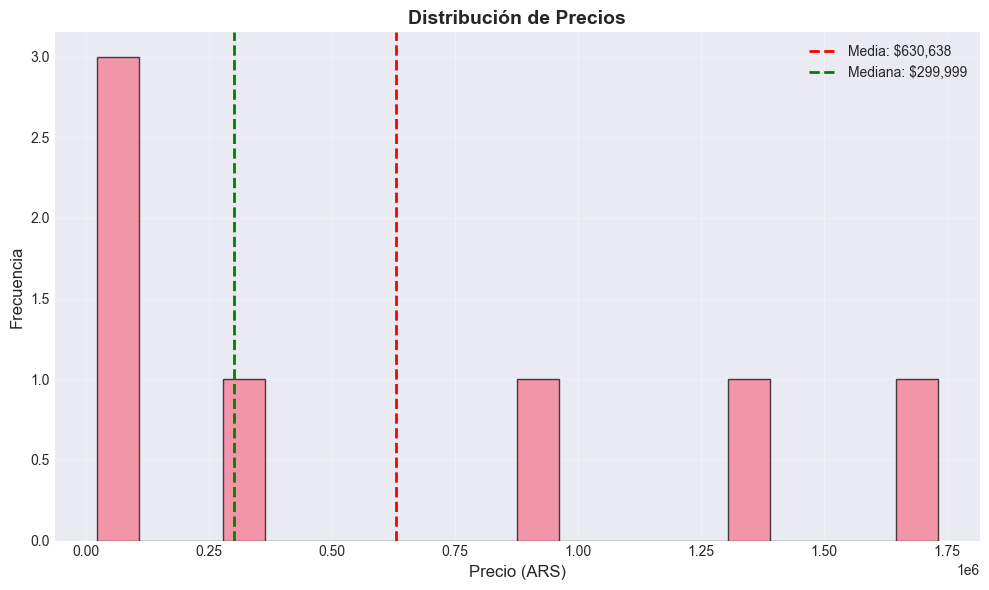

In [6]:
if products:
    product = products[0]  # 👈 Cambia el índice según necesites
    history = db.get_price_history(product['id'])
    
    if len(history) >= 5:
        print(f"📊 Distribución de precios: {product['title'][:60]}\n")
        
        analyzer = PriceAnalyzer(history)
        
        # Crear histograma
        output_path = f"../output/price_distribution_{product['id']}.png"
        analyzer.plot_price_distribution(save_path=output_path)
        
        print(f"\n✓ Gráfico guardado en: {output_path}")
    else:
        print("⚠️ Necesitas al menos 5 registros para un histograma significativo")

## 5️⃣ Análisis de Tendencias

Identifica tendencias de precios: ¿están subiendo, bajando o estables?

In [7]:
if products:
    print("📈 ANÁLISIS DE TENDENCIAS\n")
    print("="*70)
    
    trends = []
    
    for product in products:
        history = db.get_price_history(product['id'])
        
        if len(history) >= 3:
            analyzer = PriceAnalyzer(history)
            stats = analyzer.get_statistics()
            
            variation = stats['variacion_porcentual']
            
            if variation <= -5:
                trend = "📉 Bajando"
            elif variation >= 5:
                trend = "📈 Subiendo"
            else:
                trend = "➡️ Estable"
            
            trends.append({
                'title': product['title'],
                'trend': trend,
                'variation': variation,
                'current_price': stats['precio_actual'],
                'min_price': stats['precio_minimo']
            })
    
    # Ordenar por variación
    trends.sort(key=lambda x: x['variation'])
    
    for item in trends:
        print(f"{item['trend']} {item['title'][:50]}")
        print(f"  Variación: {item['variation']:.2f}%")
        print(f"  Actual: {format_price(item['current_price'])} | Mín: {format_price(item['min_price'])}")
        print()
    
    print("="*70)

📈 ANÁLISIS DE TENDENCIAS

📉 Bajando Sin título
  Variación: -90.37%
  Actual: $28.900 | Mín: $22.000



## 6️⃣ Recomendación de Compra

¿Cuál es el mejor momento para comprar cada producto?

In [8]:
if products:
    print("🎯 RECOMENDACIONES DE COMPRA\n")
    print("="*70)
    
    recommendations = []
    
    for product in products:
        history = db.get_price_history(product['id'])
        
        if len(history) >= 7:
            analyzer = PriceAnalyzer(history)
            rec = analyzer.detect_best_time_to_buy()
            
            recommendations.append({
                'title': product['title'],
                'score': rec['score'],
                'recommendation': rec['recommendation'],
                'current_price': rec['current_price'],
                'percentage_above_min': rec['percentage_above_min']
            })
    
    # Ordenar por score
    recommendations.sort(key=lambda x: x['score'], reverse=True)
    
    for i, rec in enumerate(recommendations, 1):
        stars = "⭐" * rec['score']
        
        print(f"{i}. {rec['title'][:55]}")
        print(f"   Rating: {stars} ({rec['score']}/5)")
        print(f"   Precio actual: {format_price(rec['current_price'])}")
        print(f"   Sobre mínimo: +{rec['percentage_above_min']:.1f}%")
        print(f"   💡 {rec['recommendation']}")
        print()
    
    print("="*70)

🎯 RECOMENDACIONES DE COMPRA

1. Sin título
   Rating: ⭐⭐⭐⭐ (4/5)
   Precio actual: $28.900
   Sobre mínimo: +31.4%
   💡 Buen momento para comprar. Precio por debajo del promedio



## 7️⃣ Dashboard de Resumen

Vista panorámica de todos los productos.

In [9]:
if products:
    # Crear DataFrame con información resumida
    summary_data = []
    
    for product in products:
        history = db.get_price_history(product['id'])
        
        if history:
            analyzer = PriceAnalyzer(history)
            stats = analyzer.get_statistics()
            
            summary_data.append({
                'Producto': product['title'][:40],
                'Precio Actual': stats['precio_actual'],
                'Mínimo': stats['precio_minimo'],
                'Máximo': stats['precio_maximo'],
                'Promedio': stats['precio_promedio'],
                'Variación %': stats['variacion_porcentual'],
                'Registros': stats['total_registros']
            })
    
    if summary_data:
        df_summary = pd.DataFrame(summary_data)
        
        # Formatear precios
        price_cols = ['Precio Actual', 'Mínimo', 'Máximo', 'Promedio']
        for col in price_cols:
            df_summary[col] = df_summary[col].apply(format_price)
        
        # Formatear variación
        df_summary['Variación %'] = df_summary['Variación %'].apply(lambda x: f"{x:.2f}%")
        
        print("📊 DASHBOARD DE PRODUCTOS\n")
        print("="*70)
        display(df_summary)
        print("="*70)

📊 DASHBOARD DE PRODUCTOS



,Producto,Precio Actual,Mínimo,Máximo,Promedio,Variación %,Registros
0,Sin título,$28.900,$22.000,$1.732.099,$630.638,-90.37%,7


## 8️⃣ Generar Reporte

Crea un reporte de texto con toda la información.

In [10]:
if products:
    # Preparar datos para el reporte
    latest_prices = db.get_latest_prices(limit=10)
    
    # Generar reporte
    report = generate_report(latest_prices)
    
    # Mostrar reporte
    print(report)
    
    # Guardar reporte
    report_path = f"../output/reporte_{datetime.now().strftime('%Y%m%d_%H%M')}.txt"
    save_report(report, report_path)
    
    print(f"\n✓ Reporte guardado en: {report_path}")


📊 REPORTE DE PRECIOS - MERCADOLIBRE
📅 Fecha: 11/12/2025 12:49
📦 Total de productos: 7

1. Sin título
   💰 Precio: $28.900
   🏪 Vendedor: Desconocido
   🔗 ID: 7

2. Sin título
   💰 Precio: $22.000
   🏪 Vendedor: Desconocido
   🔗 ID: 6

3. Sin título
   💰 Precio: $28.900
   🏪 Vendedor: Desconocido
   🔗 ID: 5

4. Sin título
   💰 Precio: $948.370
   🏪 Vendedor: Desconocido
   🔗 ID: 4

5. Sin título
   💰 Precio: $1.732.099
   🏪 Vendedor: Desconocido
   🔗 ID: 3

6. Sin título
   💰 Precio: $1.354.195
   🏪 Vendedor: Desconocido
   🔗 ID: 2

7. Sin título
   💰 Precio: $299.999
   🏪 Vendedor: Desconocido
   🔗 ID: 1

✓ Reporte guardado en: ../output/reporte_20251211_1249.txt

✓ Reporte guardado en: ../output/reporte_20251211_1249.txt


## 9️⃣ Exportar Datos

Exporta los datos a formatos que puedas usar en otras herramientas.

### 9.1 Exportar a JSON

In [11]:
if products:
    # Exportar lista de productos
    export_path = "../output/products.json"
    export_to_json(products, export_path)
    
    # Exportar histórico del primer producto
    if products:
        history = db.get_price_history(products[0]['id'])
        if history:
            history_path = f"../output/history_{products[0]['id']}.json"
            export_to_json(history, history_path)

✓ Datos exportados a: ../output/products.json
✓ Datos exportados a: ../output/history_0.json


### 9.2 Exportar a CSV

In [12]:
if products:
    # Crear DataFrame con todos los precios
    all_prices = []
    
    for product in products:
        history = db.get_price_history(product['id'])
        for record in history:
            all_prices.append({
                'product_id': product['id'],
                'product_title': product['title'],
                'price': record['price'],
                'seller': record['seller'],
                'free_shipping': record['free_shipping'],
                'date': record['scraped_at']
            })
    
    if all_prices:
        df_export = pd.DataFrame(all_prices)
        csv_path = "../output/all_prices.csv"
        df_export.to_csv(csv_path, index=False, encoding='utf-8')
        
        print(f"✓ Datos exportados a CSV: {csv_path}")
        print(f"  Total de registros: {len(all_prices)}")

✓ Datos exportados a CSV: ../output/all_prices.csv
  Total de registros: 7


## 🔟 Análisis Estadístico Avanzado

Algunos análisis estadísticos adicionales.

In [13]:
if products and len(products) >= 3:
    print("📊 ANÁLISIS ESTADÍSTICO AVANZADO\n")
    print("="*70)
    
    # Recopilar todas las variaciones
    all_variations = []
    all_current_prices = []
    
    for product in products:
        history = db.get_price_history(product['id'])
        if len(history) >= 2:
            analyzer = PriceAnalyzer(history)
            stats = analyzer.get_statistics()
            all_variations.append(stats['variacion_porcentual'])
            all_current_prices.append(stats['precio_actual'])
    
    if all_variations:
        import numpy as np
        
        print("Variaciones de precio:")
        print(f"  Media: {np.mean(all_variations):.2f}%")
        print(f"  Mediana: {np.median(all_variations):.2f}%")
        print(f"  Desviación estándar: {np.std(all_variations):.2f}%")
        print(f"  Máxima subida: {max(all_variations):.2f}%")
        print(f"  Máxima bajada: {min(all_variations):.2f}%")
        
        # Productos en aumento vs disminución
        increasing = sum(1 for v in all_variations if v > 0)
        decreasing = sum(1 for v in all_variations if v < 0)
        stable = sum(1 for v in all_variations if v == 0)
        
        print(f"\nTendencias generales:")
        print(f"  📈 En aumento: {increasing} ({increasing/len(all_variations)*100:.1f}%)")
        print(f"  📉 En disminución: {decreasing} ({decreasing/len(all_variations)*100:.1f}%)")
        print(f"  ➡️ Estables: {stable} ({stable/len(all_variations)*100:.1f}%)")
        
        print("\n" + "="*70)

## 🎯 Conclusión

¡Excelente! Has completado todos los notebooks del proyecto.

### 🏆 Lo que has aprendido:

✅ **Web Scraping**: Extraer datos de MercadoLibre  
✅ **Base de Datos**: SQLite para persistencia  
✅ **Análisis de Datos**: Pandas, estadísticas, tendencias  
✅ **Visualización**: Matplotlib, Seaborn, Plotly  
✅ **Automatización**: Scripts de monitoreo  
✅ **Reportes**: Generación y exportación de datos  

---

## 📈 Próximos Pasos

Ahora puedes:

1. **Monitorear productos reales** que te interesen
2. **Programar actualizaciones diarias** con el script monitor.py
3. **Compartir tu proyecto** en GitHub
4. **Agregar mejoras**:
   - Notificaciones por email/Telegram
   - Dashboard web con Streamlit/Flask
   - Machine Learning para predicción de precios
   - Scraping de otros sitios

---

## 💡 Tips Finales

- **Ejecuta el monitoreo regularmente** para tener más datos
- **Respeta los servidores** (no hagas demasiadas requests)
- **Úsalo éticamente** (solo para uso personal/educativo)
- **Documenta tus hallazgos** para tu portfolio

---

**¡Gracias por usar este proyecto! 🚀**

Si te fue útil, considera:
- ⭐ Dar una estrella en GitHub
- 📝 Compartir tus mejoras
- 💬 Dar feedback

¡Feliz scraping! 🎉